# Stochastic photo-current detection in a JC model

## Mixing stochastic and deterministic master equations

Copyright (C) 2011 and later, Paul D. Nation & Robert J. Johansson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import qutip.settings 
from qutip import *

In [3]:
from qutip.ipynbtools import HTMLProgressBar

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'STIXGeneral'
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.size'] = '14'

In [5]:
N = 15
w0 = 1.0 * 2 * np.pi
g = 0.2 * 2 * np.pi
times = np.linspace(0, 15, 150)
dt = times[1] - times[0]
gamma = 0.01
kappa = 0.1
ntraj = 150

In [6]:
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))

In [7]:
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (sm * a.dag() + sm.dag() * a)

In [8]:
rho0 = tensor(fock(N, 5), fock(2, 0))

In [9]:
e_ops = [a.dag() * a, a + a.dag(), sm.dag() * sm]

### Highly efficient detection

In [10]:
c_ops = [np.sqrt(gamma) * sm]  # collapse operator for qubit
sc_ops = [np.sqrt(kappa) * a]  # stochastic collapse for resonator

In [11]:
result_ref = mesolve(H, rho0, times, c_ops+sc_ops, e_ops)

In [12]:
result1 = smesolve(H, rho0, times, c_ops=c_ops, sc_ops=sc_ops, e_ops=e_ops, 
                   ntraj=1, nsubsteps=100, method='photocurrent',
                   store_measurement=True,
                   options=Options(store_states=True))

Total run time:  11.17s


Run the `smesolve` solver in parallel by passing the keyword argument `map_func=parallel_map`:

In [13]:
result2 = smesolve(H, rho0, times, c_ops=c_ops, sc_ops=sc_ops, e_ops=e_ops, 
                   ntraj=ntraj, nsubsteps=100, method='photocurrent',
                   store_measurement=True,
                   options=Options(store_states=True),
                   progress_bar=HTMLProgressBar(),
                   map_func=parallel_map)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

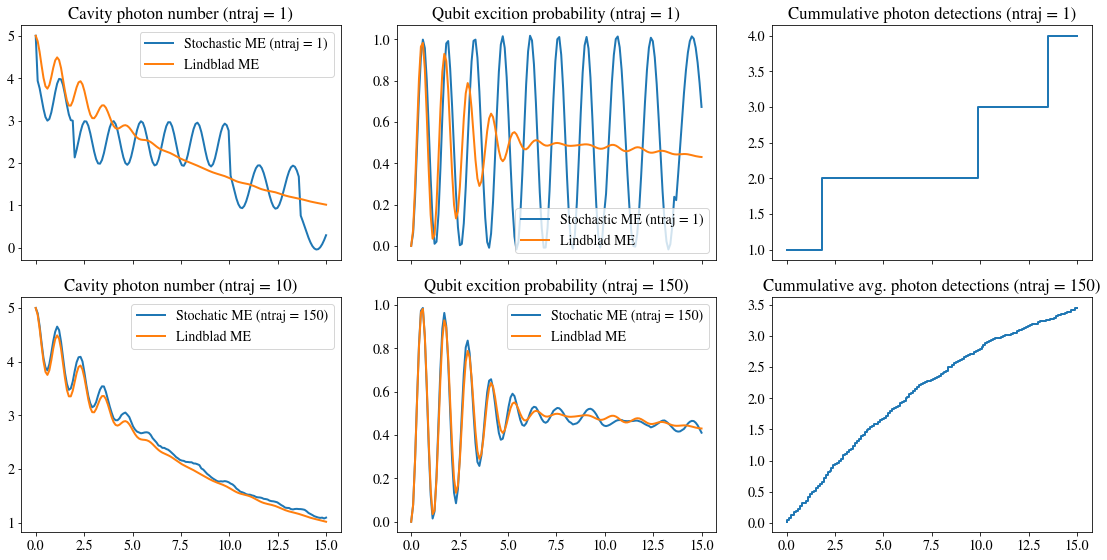

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)

axes[0,0].plot(times, result1.expect[0], label=r'Stochastic ME (ntraj = 1)', lw=2)
axes[0,0].plot(times, result_ref.expect[0], label=r'Lindblad ME', lw=2)
axes[0,0].set_title("Cavity photon number (ntraj = 1)")
axes[0,0].legend()

axes[1,0].plot(times, result2.expect[0], label=r'Stochatic ME (ntraj = %d)' % ntraj, lw=2)
axes[1,0].plot(times, result_ref.expect[0], label=r'Lindblad ME', lw=2)
axes[1,0].set_title("Cavity photon number (ntraj = 10)")
axes[1,0].legend()


axes[0,1].plot(times, result1.expect[2], label=r'Stochastic ME (ntraj = 1)', lw=2)
axes[0,1].plot(times, result_ref.expect[2], label=r'Lindblad ME', lw=2)
axes[0,1].set_title("Qubit excition probability (ntraj = 1)")
axes[0,1].legend()

axes[1,1].plot(times, result2.expect[2], label=r'Stochatic ME (ntraj = %d)' % ntraj, lw=2)
axes[1,1].plot(times, result_ref.expect[2], label=r'Lindblad ME', lw=2)
axes[1,1].set_title("Qubit excition probability (ntraj = %d)" % ntraj)
axes[1,1].legend()


axes[0,2].step(times, dt * np.cumsum(result1.measurement[0].real), lw=2)
axes[0,2].set_title("Cummulative photon detections (ntraj = 1)")
axes[1,2].step(times, dt * np.cumsum(np.array(result2.measurement).sum(axis=0).real) / ntraj, lw=2)
axes[1,2].set_title("Cummulative avg. photon detections (ntraj = %d)" % ntraj)

fig.tight_layout()

## Versions

In [15]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
